In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from datetime import datetime
 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\pilli.pavithra\Documents\bitcoin\bitcoin_2017_to_2023.csv')

In [5]:
data.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [6]:
data['timestamp']

0          2023-08-01 13:19:00
1          2023-08-01 13:18:00
2          2023-08-01 13:17:00
3          2023-08-01 13:16:00
4          2023-08-01 13:15:00
                  ...         
3125995    2017-08-17 04:04:00
3125996    2017-08-17 04:03:00
3125997    2017-08-17 04:02:00
3125998    2017-08-17 04:01:00
3125999    2017-08-17 04:00:00
Name: timestamp, Length: 3126000, dtype: object

In [7]:
data.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

In [8]:
#duplicates = data.duplicated()       # this code is showing different values as duplicates
#print((data[duplicates]).head())

In [9]:
data.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


In [20]:


data['year'] = pd.to_datetime(data['timestamp']).dt.year

# Display the updated dataframe
print(data[['timestamp', 'year']])

                   timestamp  year
0        2023-08-01 13:19:00  2023
1        2023-08-01 13:18:00  2023
2        2023-08-01 13:17:00  2023
3        2023-08-01 13:16:00  2023
4        2023-08-01 13:15:00  2023
...                      ...   ...
3125995  2017-08-17 04:04:00  2017
3125996  2017-08-17 04:03:00  2017
3125997  2017-08-17 04:02:00  2017
3125998  2017-08-17 04:01:00  2017
3125999  2017-08-17 04:00:00  2017

[3126000 rows x 2 columns]


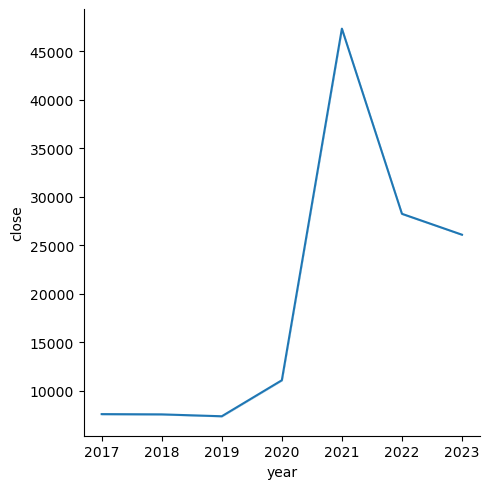

In [30]:
sns.relplot(data=data, x='year', y='close', kind='line')